## Handwritten Digits Recognition Notebook

### 1. Imports and Dataset Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load MNIST data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Quick Data Analysis

In [3]:
print(f"Training set: {x_train.shape[0]} samples, each {x_train.shape[1]}×{x_train.shape[2]} pixels")
print(f"Test set:     {x_test.shape[0]} samples")

Training set: 60000 samples, each 28×28 pixels
Test set:     10000 samples


# Class distribution

In [4]:
unique, counts = np.unique(y_train, return_counts=True)
dist = dict(zip(unique, counts))
print("Train label counts:", dist)


Train label counts: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


# Display a few samples

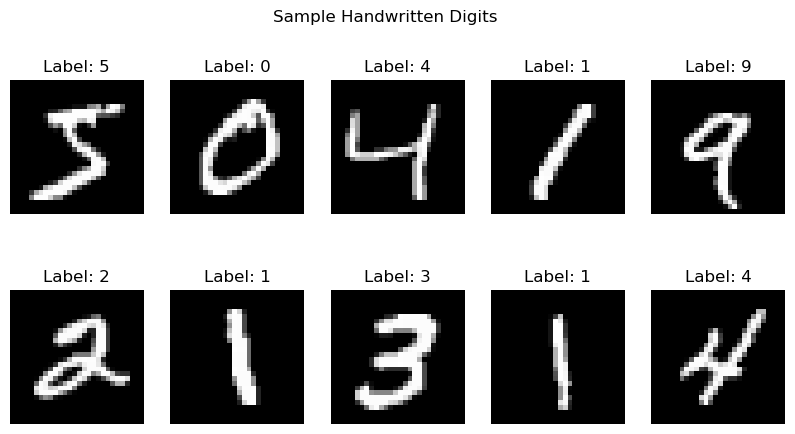

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.suptitle("Sample Handwritten Digits")
plt.show()


# 3. Preprocess for Neural Net & SKLearn
# Scale to [0,1]

In [6]:
x_train_nn = x_train.astype('float32') / 255.0
x_test_nn  = x_test.astype('float32')  / 255.0

# Flatten & one-hot encode for Keras

In [7]:
x_train_nn = x_train_nn.reshape(-1, 28*28)
x_test_nn  = x_test_nn.reshape(-1, 28*28)
y_train_nn = to_categorical(y_train, 10)
y_test_nn  = to_categorical(y_test, 10)


# For SVM / KNN we use raw pixel vectors and integer labels:

In [8]:
x_train_skl = x_train.reshape(-1, 28*28) / 255.0
x_test_skl  = x_test.reshape(-1, 28*28)  / 255.0
y_train_skl = y_train
y_test_skl  = y_test

# 4. Task 2: Train Classifiers

# 4.1 Simple Dense Neural Network

In [9]:
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(64,  activation='relu'),
    Dense(10,  activation='softmax')
])
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = nn_model.fit(x_train_nn, y_train_nn, epochs=10, batch_size=256,
                       validation_split=0.1, verbose=2)


Epoch 1/10


D:\Users\Farhan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


211/211 - 2s - 10ms/step - accuracy: 0.8695 - loss: 0.4654 - val_accuracy: 0.9523 - val_loss: 0.1756
Epoch 2/10
211/211 - 1s - 3ms/step - accuracy: 0.9485 - loss: 0.1784 - val_accuracy: 0.9610 - val_loss: 0.1332
Epoch 3/10
211/211 - 1s - 3ms/step - accuracy: 0.9627 - loss: 0.1258 - val_accuracy: 0.9695 - val_loss: 0.1011
Epoch 4/10
211/211 - 1s - 3ms/step - accuracy: 0.9713 - loss: 0.0960 - val_accuracy: 0.9733 - val_loss: 0.0909
Epoch 5/10
211/211 - 1s - 3ms/step - accuracy: 0.9771 - loss: 0.0766 - val_accuracy: 0.9733 - val_loss: 0.0853
Epoch 6/10
211/211 - 1s - 3ms/step - accuracy: 0.9813 - loss: 0.0641 - val_accuracy: 0.9767 - val_loss: 0.0801
Epoch 7/10
211/211 - 1s - 3ms/step - accuracy: 0.9840 - loss: 0.0532 - val_accuracy: 0.9743 - val_loss: 0.0826
Epoch 8/10
211/211 - 1s - 3ms/step - accuracy: 0.9870 - loss: 0.0449 - val_accuracy: 0.9763 - val_loss: 0.0828
Epoch 9/10
211/211 - 1s - 3ms/step - accuracy: 0.9883 - loss: 0.0388 - val_accuracy: 0.9765 - val_loss: 0.0809
Epoch 10/10

# 4.2 Support Vector Machine

In [10]:
svm_clf = SVC(kernel='rbf', gamma='scale')
svm_clf.fit(x_train_skl, y_train_skl)

SVC()

# 4.3 K-Nearest Neighbors

In [11]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train_skl, y_train_skl)

KNeighborsClassifier()

# 5. Task 3: Compare Performance

# 5.1 Neural Net evaluation

In [12]:
nn_loss, nn_acc = nn_model.evaluate(x_test_nn, y_test_nn, verbose=0)

# 5.2 SVM & KNN evaluation

In [13]:
svm_preds = svm_clf.predict(x_test_skl)
knn_preds = knn_clf.predict(x_test_skl)
svm_acc  = accuracy_score(y_test_skl, svm_preds)
knn_acc  = accuracy_score(y_test_skl, knn_preds)

# 5.3 Build comparison table

In [14]:
results = pd.DataFrame({
    'Model': ['NeuralNet', 'SVM (RBF)', 'KNN (k=5)'],
    'Test Accuracy': [nn_acc, svm_acc, knn_acc]
})
print("\nModel Comparison:\n", results)


Model Comparison:
        Model  Test Accuracy
0  NeuralNet         0.9755
1  SVM (RBF)         0.9792
2  KNN (k=5)         0.9688


# Detailed classification reports for chosen top-2

In [15]:
print("\nNeural Net Classification Report:")
print(classification_report(y_test_skl, nn_model.predict(x_test_nn).argmax(axis=1)))
print("\nSVM Classification Report:")
print(classification_report(y_test_skl, svm_preds))


Neural Net Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.99      0.96      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.96      0.99      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.99      0.96      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99   

# 6. Conclusion

In [16]:
best = results.loc[results['Test Accuracy'].idxmax()]
print(f"\n▶ Best model for production: {best['Model']} with accuracy {best['Test Accuracy']:.4f}")


▶ Best model for production: SVM (RBF) with accuracy 0.9792
